In [40]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
import plotly.express as px

In [3]:
# load data
file_paths = glob.glob("C:/Users/Hassan/Desktop/divvy-tripdata/*.csv")
# Load all CSV files into a list of DataFrames
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

### Data Discovering

In [4]:
combined_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
5,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.871467,-87.640949,41.871467,-87.640949,casual
6,53C38EB01E6FA5C4,classic_bike,2021-04-03 16:28:21,2021-04-03 16:29:47,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.779374,-87.664843,41.779374,-87.664843,casual
7,D53AC014EFD6E2BA,electric_bike,2021-04-06 16:35:06,2021-04-06 17:00:56,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805832,-87.592478,41.805803,-87.592662,casual
8,6E2F7CA1FA9E0AFB,classic_bike,2021-04-12 15:22:54,2021-04-12 16:15:48,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.779374,-87.664843,41.779374,-87.664843,casual
9,04218447AAC80BD1,classic_bike,2021-04-24 15:04:55,2021-04-24 15:06:16,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


In [6]:
combined_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.723532e+06,5.723532e+06,5.718816e+06,5.718816e+06
mean,4.190065e+01,-8.764629e+01,4.190091e+01,-8.764650e+01
std,4.649557e-02,2.974885e-02,4.657768e-02,2.935251e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188132e+01,-8.766014e+01,4.188132e+01,-8.766028e+01
50%,4.189862e+01,-8.764194e+01,4.189897e+01,-8.764288e+01
75%,4.192889e+01,-8.762775e+01,4.192914e+01,-8.762775e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01


In [7]:
combined_df.size

74405916

In [8]:
combined_df.shape

(5723532, 13)

### Data Cleaning

In [9]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64


In [10]:
# Impute missing values for latitude and longitude columns with median
combined_df['end_lat'].fillna(combined_df['end_lat'].median(), inplace=True)
combined_df['end_lng'].fillna(combined_df['end_lng'].median(), inplace=True)

# Remove rows with missing station-related information
combined_df.dropna(subset=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], inplace=True)


In [11]:
# Check for missing values in station-related columns after removal
missing_station_values = combined_df[['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']].isnull().sum()
print("Missing values in station-related columns after removal:\n", missing_station_values)


Missing values in station-related columns after removal:
 start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
dtype: int64


In [15]:
# Convert timestamp columns to datetime format
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

# Check consistency in data types and formats
print(combined_df.dtypes)

# Detect and handle outliers

z_scores = stats.zscore(combined_df['start_lat'])
outliers1 = combined_df[(z_scores > 3) | (z_scores < -3)]


# verify
print(combined_df.head())

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object
            ride_id rideable_type          started_at            ended_at  \
0  6C992BD37A98A63F  classic_bike 2021-04-12 18:25:36 2021-04-12 18:56:55   
1  1E0145613A209000   docked_bike 2021-04-27 17:27:11 2021-04-27 18:31:29   
2  E498E15508A80BAD   docked_bike 2021-04-03 12:42:45 2021-04-07 11:40:24   
3  1887262AD101C604  classic_bike 2021-04-17 09:17:42 2021-04-17 09:42:48   
4  C123548CAB2A32A5   docked_bike 2021-04-03 12:42:25 2021-04-03 14:13:42   

         start_station_name start_station_

In [16]:
# Standardize station names (convert to lowercase and remove leading/trailing whitespaces)
combined_df['start_station_name'] = combined_df['start_station_name'].str.lower().str.strip()
combined_df['end_station_name'] = combined_df['end_station_name'].str.lower().str.strip()

In [17]:
# Check for duplicate rows
duplicate_rows = combined_df[combined_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []


In [18]:
# creating columns
combined_df['month'] = combined_df['started_at'].dt.month_name().str.slice(stop=3)
combined_df['year'] = combined_df['started_at'].dt.year.astype(str)
combined_df['day_of_week'] = combined_df['started_at'].dt.day_name().str.slice(stop=3)
combined_df['hour'] = combined_df['started_at'].dt.strftime('%I%p')


# ride duration in minutes
combined_df['ride_duration'] = (combined_df['ended_at'] - combined_df['started_at']).dt.total_seconds() / 60

# Ordering day_of_week column
combined_df['day_of_week'] = pd.Categorical(combined_df['day_of_week'], ordered=True)

# Ordering month column
combined_df['month'] = pd.Categorical(combined_df['month'], ordered=True)

# Renaming columns
combined_df.rename(columns={'rideable_type': 'bike', 'member_casual': 'user'}, inplace=True)

# Remove rows where ride duration is negative
combined_df = combined_df[combined_df['ride_duration'] >= 0]

combined_df.head()

,ride_id,bike,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user,month,year,day_of_week,hour,ride_duration
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,state st & pearson st,TA1307000061,southport ave & waveland ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,Apr,2021,Mon,06PM,31.316667
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,dorchester ave & 49th st,KA1503000069,dorchester ave & 49th st,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,Apr,2021,Tue,05PM,64.300000
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,loomis blvd & 84th st,20121,loomis blvd & 84th st,20121,41.741487,-87.658410,41.741487,-87.658410,casual,Apr,2021,Sat,12PM,5697.650000
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,honore st & division st,TA1305000034,southport ave & waveland ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,Apr,2021,Sat,09AM,25.100000
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,loomis blvd & 84th st,20121,loomis blvd & 84th st,20121,41.741487,-87.658410,41.741487,-87.658410,casual,Apr,2021,Sat,12PM,91.283333


In [19]:
combined_df['ride_duration'].describe()

count    4.641279e+06
mean     2.135739e+01
std      1.812009e+02
min      0.000000e+00
25%      6.783333e+00
50%      1.195000e+01
75%      2.166667e+01
max      5.594415e+04
Name: ride_duration, dtype: float64

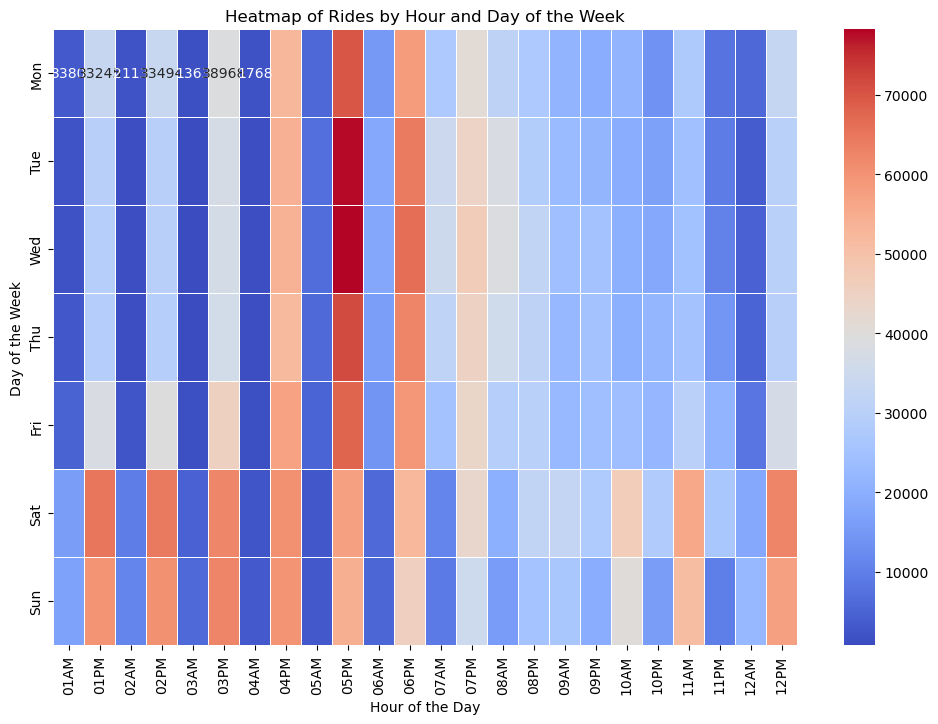

In [20]:
# pivot table for the heatmap
pivot_table = combined_df.pivot_table(index='day_of_week', columns='hour', values='ride_id', aggfunc='count')

# Ordering the days of the week for the heatmap
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_table = pivot_table.reindex(day_order)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=.5, annot=True, fmt="d")
plt.title('Heatmap of Rides by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


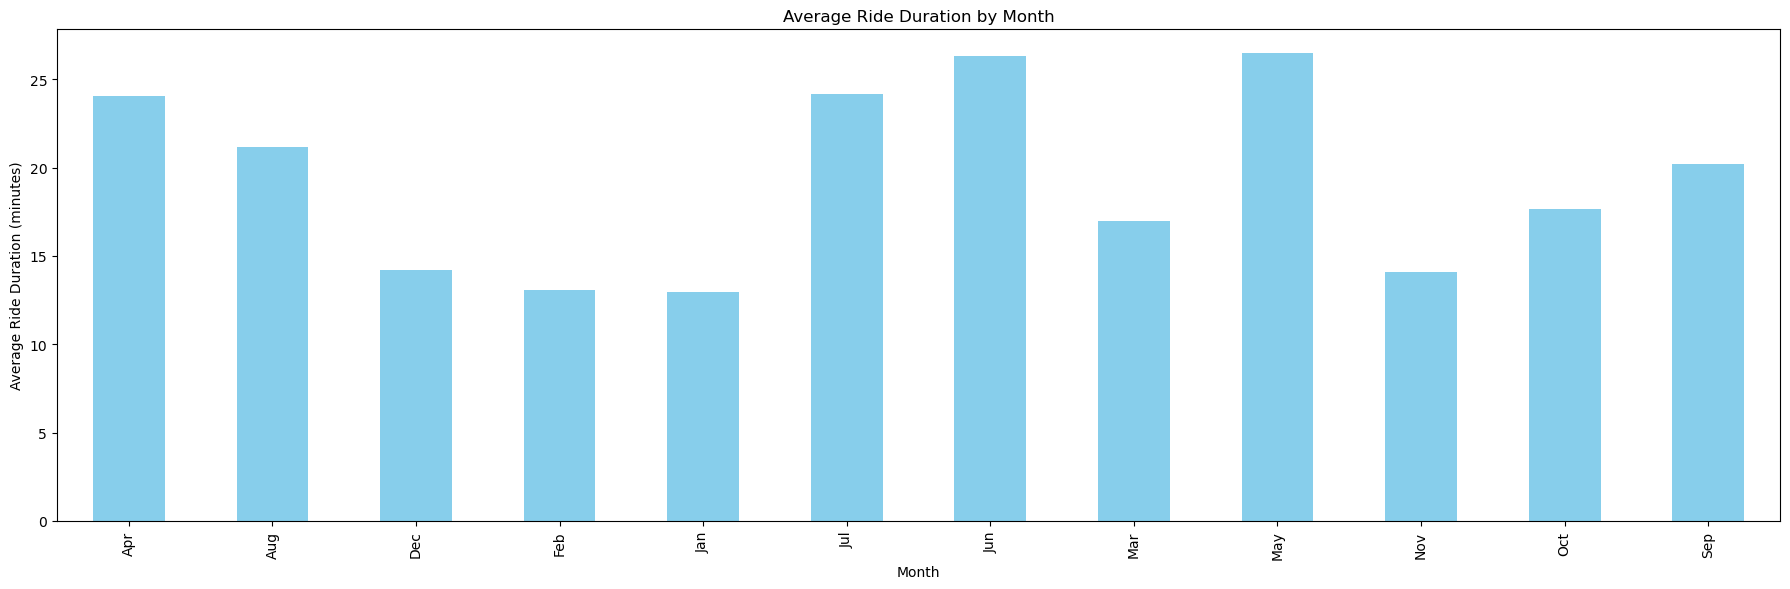

In [23]:
# average ride duration by month
monthly_avg_duration = combined_df.groupby('month')['ride_duration'].mean()

# Plotting trends
plt.figure(figsize=(18, 6))

monthly_avg_duration.plot(kind='bar', color='skyblue')
plt.title('Average Ride Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')


plt.tight_layout()
plt.show()

In [24]:
# Group by user and bike
grouped_df = combined_df.groupby(['user', 'bike'])

# aggregate statistics for ride duration
ride_duration_stats = grouped_df['ride_duration'].agg(['mean', 'median', 'std', 'min', 'max'])

# statistics
print(ride_duration_stats)

                           mean     median         std  min           max
user   bike                                                              
casual classic_bike   25.859059  15.933333   43.243460  0.0   1499.900000
       docked_bike    77.486131  28.633333  697.953807  0.0  55944.150000
       electric_bike  19.680435  12.883333   21.309378  0.0    480.000000
member classic_bike   13.335165   9.766667   18.830635  0.0   1495.633333
       electric_bike  11.652368   8.683333   12.664129  0.0    478.533333


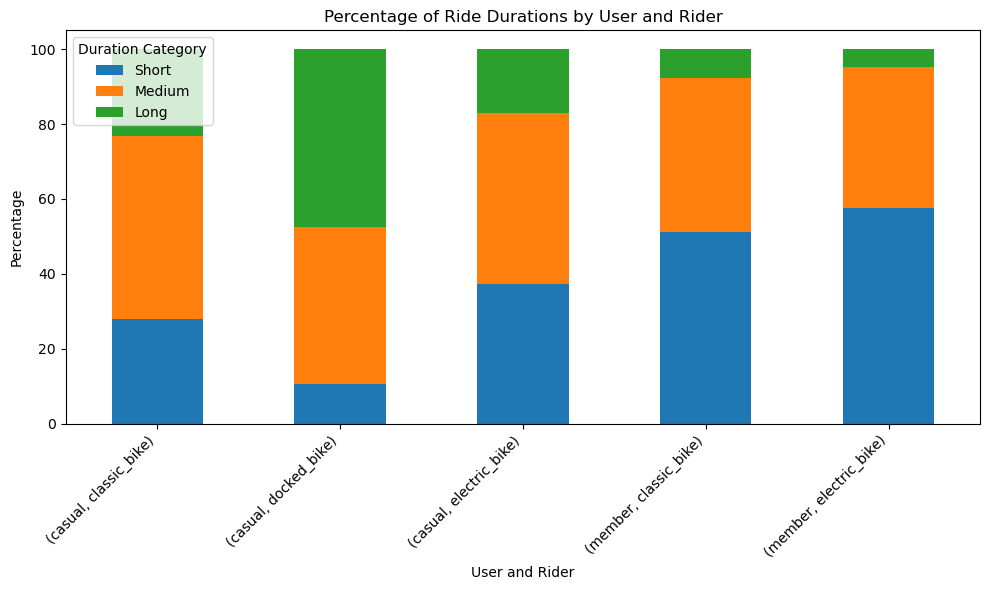

In [26]:
# Defining bins for ride duration categories
bins = [0, 10, 30, float('inf')]
labels = ['Short', 'Medium', 'Long']

# Apply pd.cut() to categorize ride durations
combined_df['duration_category'] = pd.cut(combined_df['ride_duration'], bins=bins, labels=labels, right=False)

# Group by user and bike and count the number of rides in each category
grouped_df = combined_df.groupby(['user', 'bike', 'duration_category'], observed=True).size().unstack(fill_value=0)

# percentage for each category
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# percentage distribution
grouped_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Ride Durations by User and Rider')
plt.xlabel('User and Rider')
plt.ylabel('Percentage')
plt.legend(title='Duration Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
# number of rides for each user type
user_type_counts = combined_df['user'].value_counts()

# percentage of casual vs. member riders
user_type_percentage = user_type_counts / user_type_counts.sum() * 100

print("Percentage of Casual vs. Member Riders:")
print(user_type_percentage)


Percentage of Casual vs. Member Riders:
user
member    55.954081
casual    44.045919
Name: count, dtype: float64


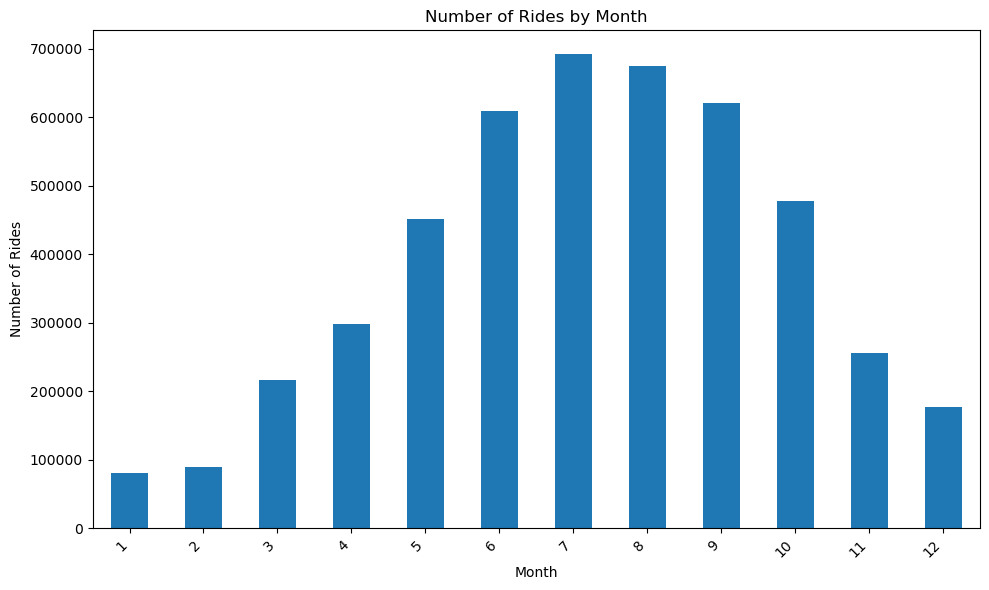

In [28]:
# Group by month and count the number of rides
monthly_rides = combined_df.groupby(combined_df['started_at'].dt.month)['ride_id'].count()

# number of rides per month
monthly_rides.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


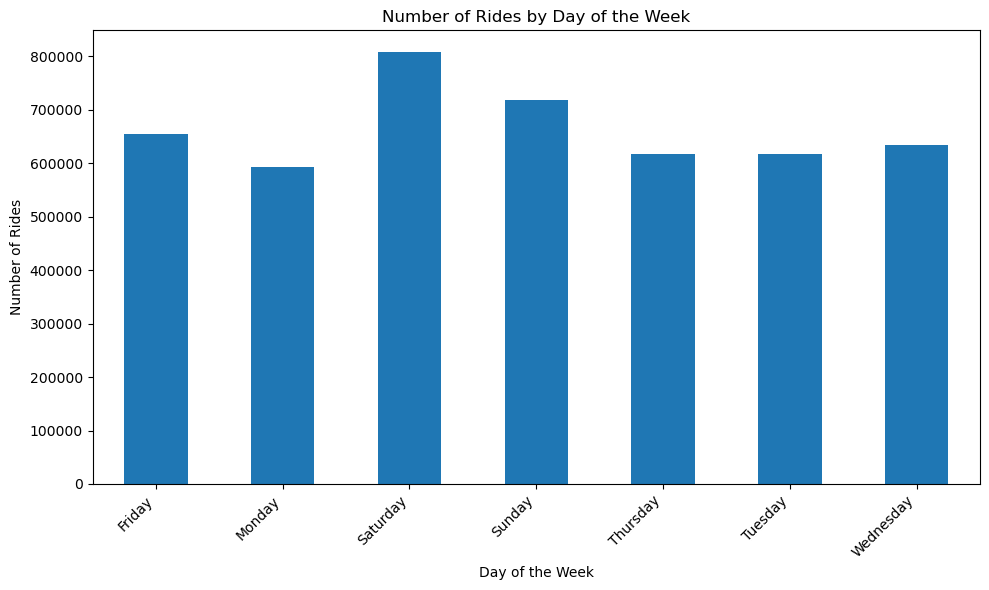

In [29]:
# Group by day of the week and count the number of rides
daily_rides = combined_df.groupby(combined_df['started_at'].dt.day_name())['ride_id'].count()

# number of rides per day of the week
daily_rides.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


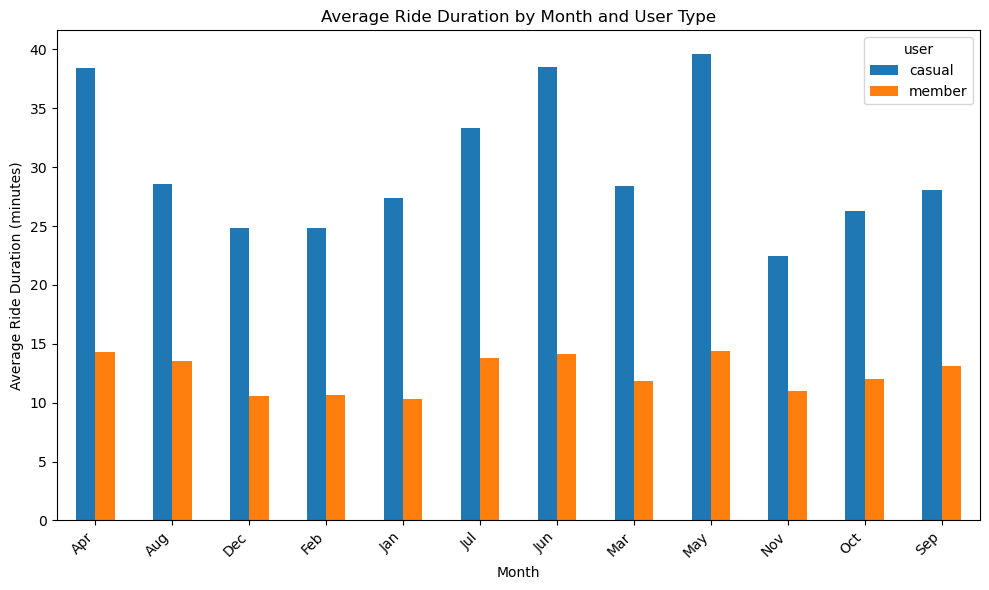

In [30]:
# Group by month and user type, and calculate the average ride duration
monthly_duration = combined_df.groupby(['month', 'user'])['ride_duration'].mean()

# average ride duration by month and user type
monthly_duration.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Ride Duration by Month and User Type')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


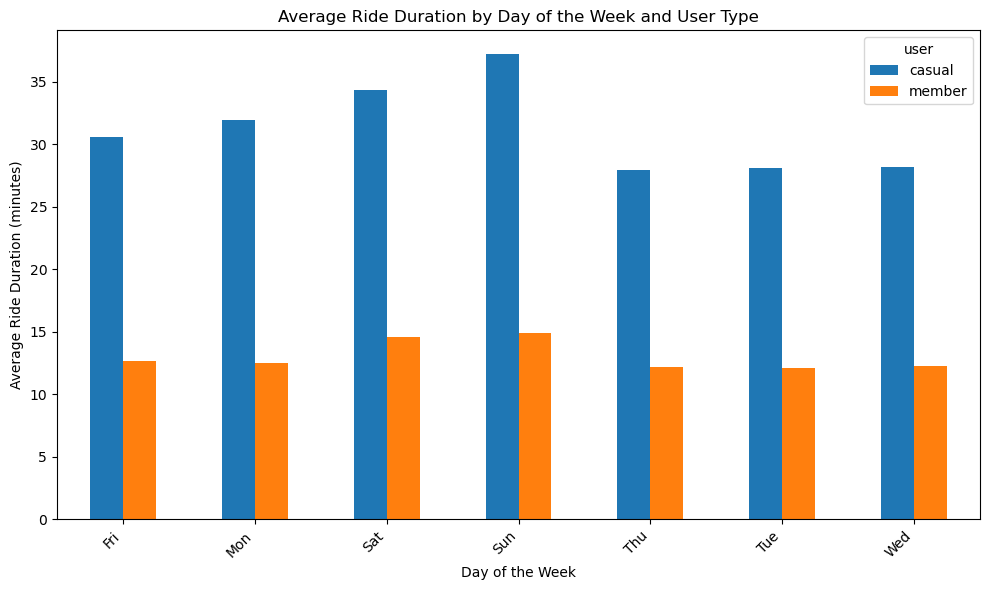

In [31]:
# Group by day of the week and user type, and calculate the average ride duration
daily_duration = combined_df.groupby(['day_of_week', 'user'])['ride_duration'].mean()

# average ride duration by day of the week and user type
daily_duration.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Ride Duration by Day of the Week and User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


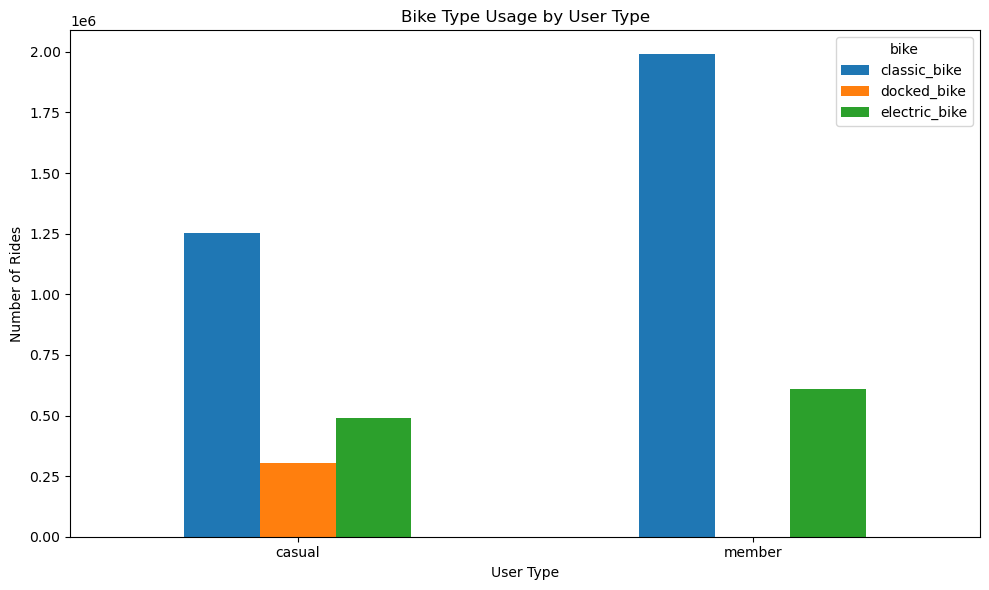

In [32]:
# Group by user type and bike type, and count the number of rides
bike_type_usage = combined_df.groupby(['user', 'bike'])['ride_id'].count()

# bike type usage by user type
bike_type_usage.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Bike Type Usage by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [39]:
combined_df['month_year'] = combined_df['started_at'].dt.to_period('M') 
monthly_rides = combined_df.groupby('month_year')['ride_id'].count()


output_notebook()

p = figure(title="Monthly Ride Trends", x_axis_label='Month and Year', y_axis_label='Number of Rides',
           x_axis_type='datetime', width=800)

p.line(x=monthly_rides.index.to_timestamp(), y=monthly_rides.values, legend_label='Total Rides')
p.add_tools(HoverTool())

show(p)



Loading BokehJS ...

In [48]:
# Group data by user type and calculate average duration and other metrics
user_grouped = combined_df.groupby('user')['ride_duration'].agg(['mean', 'std', 'count'])

print(user_grouped)

# a t-test to test if the differences are statistically significant

casual_durations = combined_df[combined_df['user'] == 'casual']['ride_duration']
member_durations = combined_df[combined_df['user'] == 'member']['ride_duration']

t_stat, p_val = ttest_ind(casual_durations, member_durations, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


             mean         std    count
user                                  
casual  32.048692  271.931602  2044294
member  12.941412   17.597075  2596985
T-statistic: 100.29891686765859, P-value: 0.0
